In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
tit=pd.read_csv("Titanic.csv")
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


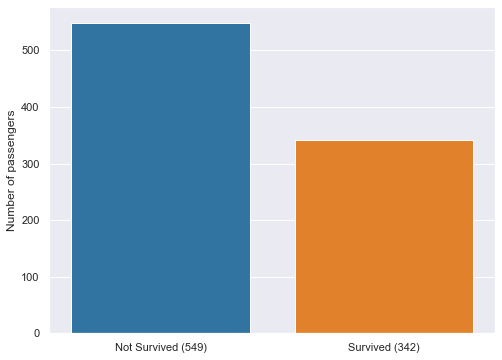

In [7]:
import matplotlib.pyplot as plt
sum_of_survived = tit['Survived'].value_counts()[1]
sum_of_not_survived = tit['Survived'].value_counts()[0]

plt.figure(figsize=(8,6))
sns.countplot(data=tit, x='Survived')
plt.title('')
plt.ylabel('Number of passengers')
plt.xlabel('')
plt.xticks((0,1),['Not Survived ({})'.format(sum_of_not_survived),"Survived ({})".format(sum_of_survived)])
plt.show()

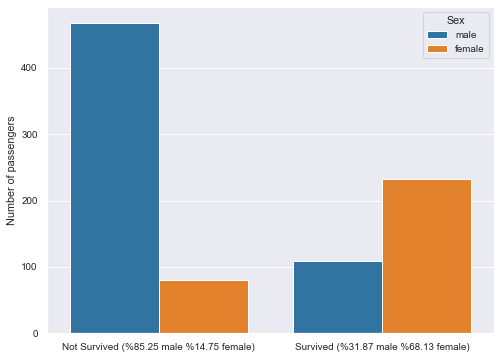

In [9]:
male_not_survived = tit.loc[(tit['Sex'] == 'male'),'Survived'].value_counts()[0]
female_not_survived = tit.loc[(tit['Sex'] == 'female'),'Survived'].value_counts()[0]
Per_not_male = round(male_not_survived *100 / (male_not_survived + female_not_survived),2)
Per_not_female = round(female_not_survived *100 / (male_not_survived + female_not_survived),2)

male_survived = tit.loc[(tit['Sex'] == 'male'),'Survived'].value_counts()[1]
female_survived = tit.loc[(tit['Sex'] == 'female'),'Survived'].value_counts()[1]
Per_male = round(male_survived *100 / (male_survived + female_survived),2)
Per_female = round(female_survived *100 / (male_survived + female_survived),2)

plt.figure(figsize=(8,6))
sns.countplot(data=tit, x='Survived',hue='Sex')

plt.title('')
plt.ylabel('Number of passengers')
plt.xlabel('')
plt.xticks((0,1),['Not Survived (%{} male %{} female)'.format(Per_not_male,Per_not_female),"Survived (%{} male %{} female)".format(Per_male,Per_female)])
plt.show()

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


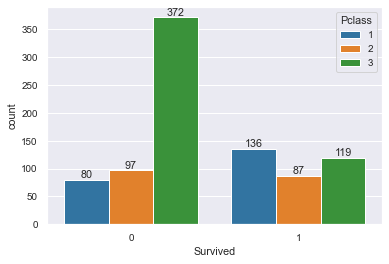

In [10]:


print(tit[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False))
ax = sns.countplot(data=tit, x='Survived',hue='Pclass')
for container in ax.containers:
    ax.bar_label(container)

plt.show()



<AxesSubplot:xlabel='Age', ylabel='Count'>

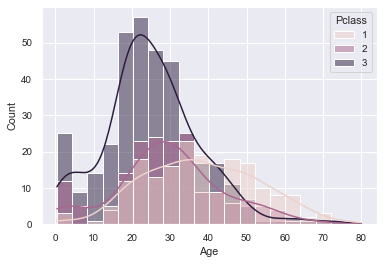

In [11]:


sns.histplot(data=tit, x="Age",hue='Pclass',kde=True)


In [15]:
tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
tit['Embarked'] = tit["Embarked"].fillna(tit['Embarked'].mode()[0])

In [14]:
tit['Sex'] = tit['Sex'].map({'male':1,'female':0}).astype(int)

#Mapping Embarked
tit['Embarked'] = tit['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [17]:
def add_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return tit[tit['Pclass']==1]['Age'].mean()
        elif Pclass==2:
            return tit[tit['Pclass']==2]['Age'].mean()
        elif Pclass==3:
            return tit[tit['Pclass']==3]['Age'].mean()
    else:
        return Age

In [18]:
tit['Age']=tit[['Age','Pclass']].apply(add_age,axis=1)

In [20]:
tit.drop('Cabin',axis=1,inplace=True)

In [21]:
tit.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [22]:
x=tit.drop('Survived',axis=1)
y=tit['Survived']

In [23]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [27]:
models = {
    "lr":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "svc":SVC(),
    "dt":DecisionTreeClassifier(),
    "rf":RandomForestClassifier(),

}

In [29]:
for name, model in models.items():
  print(f'training model {name} \n---------')
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))

training model lr 
---------
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       114
           1       0.76      0.77      0.76        65

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

training model KNN 
---------
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       114
           1       0.57      0.55      0.56        65

    accuracy                           0.69       179
   macro avg       0.66      0.66      0.66       179
weighted avg       0.69      0.69      0.69       179

training model svc 
---------


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.73      0.92      0.81       114
           1       0.74      0.40      0.52        65

    accuracy                           0.73       179
   macro avg       0.74      0.66      0.67       179
weighted avg       0.73      0.73      0.71       179

training model dt 
---------
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       114
           1       0.69      0.77      0.73        65

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179

training model rf 
---------
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       114
           1       0.74      0.80      0.77        65

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg    